In [1]:
import matplotlib.pyplot as plt
import cv2
from fastsam import FastSAM, FastSAMPrompt
import torch

In [2]:
model = FastSAM('C:\\Users\\Дима\\Documents\\ML\\Сириус\\Проект\\FastSAM\\Models\\FastSAM-x.pt')

In [3]:
IMAGE_PATH = 'images/dogs.jpg'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
DEVICE

device(type='cuda')

In [5]:
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

1072 603


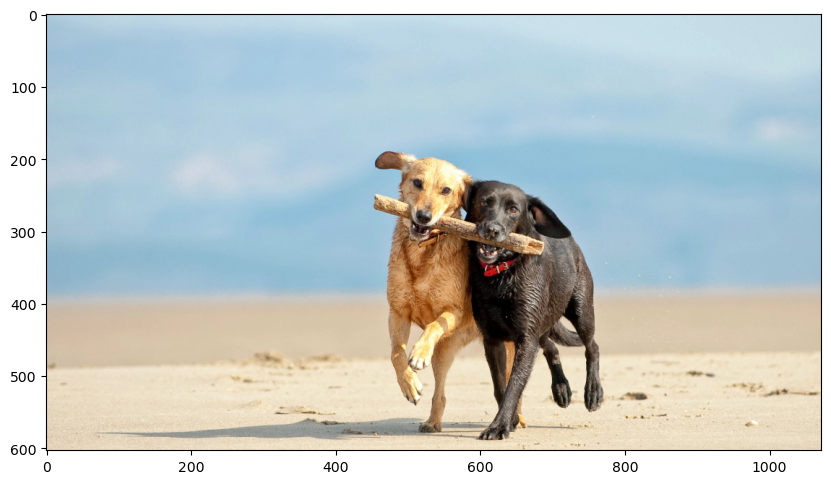

In [6]:
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.imshow(image)

In [7]:
everything_results = model(IMAGE_PATH, device=DEVICE, retina_masks=True, imgsz=1024, conf=0.4, iou=0.9,)
prompt_process = FastSAMPrompt(IMAGE_PATH, everything_results, device=DEVICE)

# everything prompt
ann = prompt_process.everything_prompt()

# # bbox default shape [0,0,0,0] -> [x1,y1,x2,y2]
# ann = prompt_process.box_prompt(bbox=[[200, 200, 300, 300]])

# # text prompt
# ann = prompt_process.text_prompt(text='a photo of a dog')

# # point prompt
# # points default [[0,0]] [[x1,y1],[x2,y2]]
# # point_label default [0] [1,0] 0:background, 1:foreground
# ann = prompt_process.point_prompt(points=[[620, 360]], pointlabel=[1])

prompt_process.plot(annotations=ann,output_path='./output/dog.jpg',)

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(ann[0])

IndexError: list index out of range

<Figure size 1000x1000 with 0 Axes>

In [ ]:
ann